· Encontrar cual es la serie más exitosa entre los adolescentes del género femenino, mayores a 16 años, en México, para promocionar una serie no animada.
 Encontrar las 20 candidatas


In [2]:
import pandas as pd

In [3]:
netflix_dataset = pd.read_csv("./netflix_list.csv")
netflix_dataset


,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,2,18,2021.0,NaN,NaN,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,tt7255502,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,tt0108778,Friends,4,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
4,tt9251798,Ragnarok,5,18,2020.0,NaN,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,tt9777386,Merry Happy Whatever,"16,543",13,2019.0,NaN,NaN,28,tvEpisode,United States,English,When his daughter arrives home for the holiday...,When his daughter arrives home for the holiday...,6.1,221.0,Comedy,0,"['Dennis Quaid', 'Bridgit Mendler', 'Brent Mor...",https://m.media-amazon.com/images/M/MV5BOTc0ND...
7004,tt9790434,The Morning Show,"16,569",NaN,2019.0,NaN,NaN,30,tvEpisode,-,-,NaN,-,NaN,NaN,\N,0,"['Bounty Hunters Brothers', 'Bruce Lourie', 'C...",https://m.media-amazon.com/images/G/01/imdb/im...
7005,tt9817600,Losers,"16,599",16,2019.0,NaN,NaN,\N,tvEpisode,-,-,"The life of Michael Bentt, a champion boxer fo...","The life of Michael Bentt, a champion boxer fo...",8.0,221.0,"Documentary,Sport",0,"['Michael Bentt', 'Harold Perrineau', 'Mickey ...",https://m.media-amazon.com/images/M/MV5BOTY3Zj...
7006,tt9842922,Firefly Lane,"16,627",18,2021.0,NaN,NaN,51,tvEpisode,United States,English,Kate experiences the force of nature that is T...,Kate experiences the force of nature that is T...,7.3,380.0,"Drama,Romance",0,"['Katherine Heigl', 'Sarah Chalke', 'Ben Lawso...",https://m.media-amazon.com/images/M/MV5BODM3OW...


Eliminamos las celdas con elementos vacios

In [24]:
tvseries_dataset = netflix_dataset[(netflix_dataset["type"] == "tvSeries")].dropna()
tvminiseries_dataset = netflix_dataset[(netflix_dataset["type"] == "tvMiniSeries")].dropna()

Segmentamos la categoria de las series a 16+

In [25]:

tvseries_dataset = tvseries_dataset.loc[tvseries_dataset["certificate"].str.contains("16|16+|18|18+", case=False)]
tvminiseries_dataset = tvminiseries_dataset.loc[tvminiseries_dataset["certificate"].str.contains("16|16+|18|18+", case=False)]

# concatenamos los datasets
series_certificate_dataset = pd.concat([tvseries_dataset, tvminiseries_dataset])

encontramos los indices de las series que son animadas

<AxesSubplot:xlabel='title'>

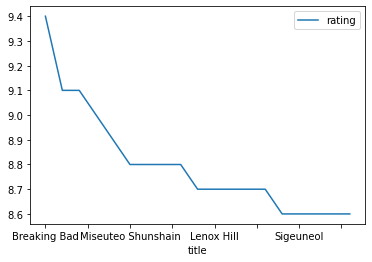

In [46]:
tv_animate_index_dataset = series_certificate_dataset.index[series_certificate_dataset["genres"].str.contains("Animation", case=False)].to_list()

#Diferencia de conjuntos
total_index_dataset = series_certificate_dataset.index.difference(tv_animate_index_dataset)

result_dataset = netflix_dataset.iloc[total_index_dataset].sort_values(by="rating", ascending=False)[0:19]

result_dataset.plot(kind="line", x="title", y="rating")
